In [1]:
# project: p1
# submitter: yzhang2232
# partner: none
# hours: 5

In [2]:
import copy
import json
import os
from time import time
import pandas as pd
import numpy as np
from subprocess import check_output
from subprocess import CalledProcessError
from subprocess import PIPE

In [3]:
#q1
type(7/2)

float

In [4]:
#q2
x = 4
maximum = 10
minimum = 5
error = x > maximum or x < minimum # True if x is outside the minimum-to-maximum range
error

True

In [5]:
#q3
word = "KAFKAESQUE"
suffix_match = word.lower()[-5:] == "esque" # .endswith(...) method not allowed for this question! (practice slicing)
suffix_match

True

In [6]:
def add(x, y = 1):
    result = x + y
    return result

In [7]:
#q4
add(3,4)

7

In [8]:
#q5
add(9)

10

In [9]:
#q6
x = 4
if x < 0:
    status = "negative"
elif x > 0:
    status = "positive"
else:
    status = "zero"
status

'positive'

In [10]:
nums = [3, 4, 1, 6]
for x in nums:
    print(x)

3
4
1
6


In [11]:
def smart_count(num_list):
    list_sum = 0
    for i in num_list:
        if i > 10:
            continue
        elif i < 0:
            break
        else:
            list_sum += i
    return list_sum
    # DO SOMETHING

In [12]:
#q7
smart_count(nums)

14

In [13]:
#q8
smart_count([2,1,11,3,15,-1,8,2])

6

In [14]:
header = ["A", "B", "C"]

coord1 = {"x": 8, "y": 5}
coord2 = {"x": 9, "y": 2}
coord3 = {"x": 3, "y": 1}

rows = [
    [1, 6, coord1],
    [3, 4, coord2],
    [5, 2, coord3],
]

In [15]:
#q9
coord3["z"] = 3.14
rows

[[1, 6, {'x': 8, 'y': 5}],
 [3, 4, {'x': 9, 'y': 2}],
 [5, 2, {'x': 3, 'y': 1, 'z': 3.14}]]

In [16]:
#q10
rows[0][-1]["x"]

8

In [17]:
#q11
v2 = copy.copy(rows)
v2[0] = 8888    # first change
v2[1][1] = 9999 # second change
rows

[[1, 6, {'x': 8, 'y': 5}],
 [3, 9999, {'x': 9, 'y': 2}],
 [5, 2, {'x': 3, 'y': 1, 'z': 3.14}]]

In [18]:
#q12
posit = header.index("B")
sum_val = 0
for i in rows:
    sum_val += i[posit]
sum_val

10007

In [19]:
#q13
rows.sort(key=lambda row: row[header.index("B")], reverse=False)
rows

[[5, 2, {'x': 3, 'y': 1, 'z': 3.14}],
 [1, 6, {'x': 8, 'y': 5}],
 [3, 9999, {'x': 9, 'y': 2}]]

In [20]:
#q14
f = open("usd.json")
data = json.load(f)
f.close()
data["eur"]["rate"] * 400

351.68980166476797

In [21]:
def divide(num, deno):
    try:
        return num/deno
    except ZeroDivisionError:
        return float("nan")

In [22]:
#q15
divide(3,2)

1.5

In [23]:
#q16
divide(-3, 0)

nan

In [24]:
years = {}
files = os.listdir("home-computers")
for file in files:
    index = file.find(".")
    df = pd.read_csv(os.path.join("home-computers",file), skiprows = 1)
    value = df.set_index("Geographic Area Name")
    years[int(file[index-4:index])] = value

In [25]:
#q17
sorted(list(years.keys()))

[2013, 2014, 2015, 2016, 2017, 2018]

In [26]:
#q18
years[2018].at["Wisconsin", "Estimate!!Total"]

2371960

In [27]:
#q19
years[2018]["Estimate!!Total!!No Computer"].sum()

10285814

In [28]:
#q20
margin = years[2018]["Margin of Error!!Total!!No Computer"]
total = years[2018]["Estimate!!Total!!No Computer"]
fraction = margin / total
fraction.max()

0.12375641594322287

In [29]:
#q21
states = ["Illinois", "Indiana", "Iowa", "Michigan", "Minnesota", "Wisconsin"]
dic = {}
for state in states:
    household = years[2018]["Estimate!!Total"][state]
    noncomp = years[2018]["Estimate!!Total!!No Computer"][state]
    dic[state] = noncomp / household * 100
dic

{'Illinois': 8.524143737625552,
 'Indiana': 9.463486214247707,
 'Iowa': 9.468929459023103,
 'Michigan': 8.936374942955922,
 'Minnesota': 7.491847623005652,
 'Wisconsin': 9.582497175331794}

<AxesSubplot:xlabel='Geographic Area Name', ylabel='% of Households w/o Computers'>

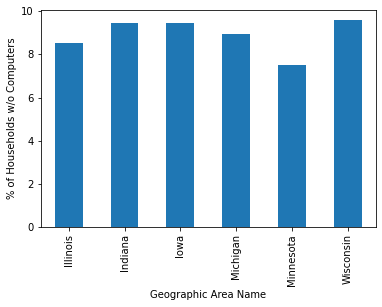

In [30]:
#q22
pd.Series(dic).plot.bar(xlabel = "Geographic Area Name", ylabel = "% of Households w/o Computers")

Text(0, 0.5, 'WI Households without Computers (thousands)')

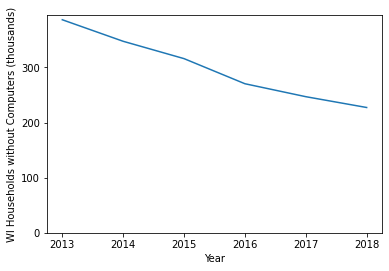

In [31]:
#q23
year_noncomp = {}
for key in sorted(list(years.keys())):
    value = years[key].at["Wisconsin","Estimate!!Total!!No Computer"]
    year_noncomp[key] = value / 1000
    
s = pd.Series(year_noncomp).plot.line()
s.set_yticks([0,100,200,300])
s.set_xlabel("Year")
s.set_ylabel("WI Households without Computers (thousands)")

Text(0, 0.5, 'Tablets (millions)')

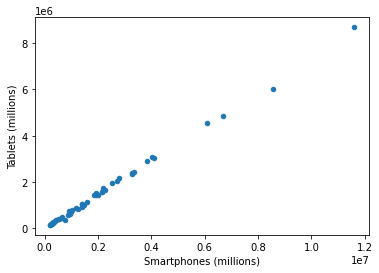

In [32]:
#q24
smartphones = years[2018]["Estimate!!Total!!Has one or more types of computing devices!!Smartphone"]
tablets = years[2018]["Estimate!!Total!!Has one or more types of computing devices!!Tablet or other portable wireless computer"]
df = pd.concat([smartphones, tablets], axis = 1)
p = df.plot.scatter(x="Estimate!!Total!!Has one or more types of computing devices!!Smartphone",y="Estimate!!Total!!Has one or more types of computing devices!!Tablet or other portable wireless computer")
p.set_xlabel("Smartphones (millions)")
p.set_ylabel("Tablets (millions)")

In [33]:
#q25
check_output(["git","log"],cwd = "flask").decode("UTF-8").split("\n")[0]

'commit 660994efc761efdfd49ca442b73f6712dc77b6cf'

In [34]:
#q26
log_list = check_output(["git","log"],cwd = "flask").decode("UTF-8").split("\n")
commit_list = []
for info in log_list:
    if info.startswith("commit"):
        num = info.split(" ")[1]
        commit_list.append(num)
commit_list[-50:]

['7b5015010bc8c2a2d56c7c50b37e5b9facdad102',
 '40e0024d7b87150ed694829a5335bd2435962225',
 '6dd92ae4b32c336564231e10db12458a8b9261ca',
 '1246f4088a4fdc00a79f8029ff5d77bfe4fc9b14',
 'c4f5c2fb9afc1679c085500830bd53fab93ad885',
 '1d8432ebfd1637eacab79a15e9b7963bf061371c',
 'fc94599285aa1aec50b3c9426697249e55edda0a',
 'c33675f0251071ea47ce166b81ce8c637842f091',
 '2d9bb692728fd76b19e467499caa4f5fcb07aede',
 'ca520fb7e4c29afccc637e61c11429a0f3e8d5ad',
 '08f1f0dc32004fae01cf96d1eed84e6461e698e5',
 '8009bd986940378bba1399dbfce90d03e441467b',
 'a42728568e18bedf588be2357b56021ab85b9fad',
 '959b5df00431c436474c5abca304e631c0de7721',
 '4affedec356ad8c9e6a107578f03fc7f5c615064',
 'de03143f6ecf9a36dd32f16f07309c64d4de03b0',
 'a01e8b49ca66608f0bd46134ff02deeb5724c799',
 '36071ca1f42a26ef327e9d14e4909a8c92cd4fae',
 '51c9829a9cdfa2bf301431f686d7a404cc7c5083',
 '2f5a4f8dbc832b0daebcd66ea8b3969589191fa7',
 '03148dba6b26a2694da1d466584f50189c52e7b3',
 'ef524f2cfd65377b3b9ce896e7a710472b13c0f6',
 'f2dc38cd

In [35]:
#q27
check_output(["git","checkout",commit_list[-3]], cwd = "flask")
f = open("flask/README")
data = f.read()
f.close()
data

Note: switching to '4ec7d2a0d8eac4f915dc0d38a886cd57045bb0c4'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by switching back to a branch.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -c with the switch command. Example:

  git switch -c <new-branch-name>

Or undo this operation with:

  git switch -

Turn off this advice by setting config variable advice.detachedHead to false

HEAD is now at 4ec7d2a0 Started working on documentation.


"\n                        // Flask //\n\n     because a pocket knife is not the only thing that\n                    might come in handy\n\n\n    ~ What is Flask?\n\n      Flask is a microframework for Python based on Werkzeug\n      and Jinja2.  It's intended for small scale applications\n      and was development with best intentions in mind.\n\n   ~ Is it ready?\n\n      Nope, this is still work in progress, but I am happy to\n      accept patches and improvements already.\n"

In [36]:
check_output(["git","checkout", "main"], cwd = "flask")

Previous HEAD position was 4ec7d2a0 Started working on documentation.
Switched to branch 'main'


b"Your branch is up to date with 'origin/main'.\n"

In [37]:
#q28
count_dict = {}
for info in log_list:
    if "Merge pull request" in info and "/" in info:
        key = info.split("/")[0].split(" ")[-1]
        if key not in count_dict:
            count_dict[key] = 0
        count_dict[key] += 1
count_dict

{'Yourun-proger': 2,
 'olliemath': 1,
 'pallets': 204,
 'jugmac00': 1,
 'pgjones': 14,
 'eprigorodov': 1,
 'HenryKobin': 1,
 'delicb': 1,
 'vinzid': 1,
 'karintou8710': 1,
 'kkirsche': 2,
 'matipau': 1,
 'Makonede': 1,
 'sprutner': 1,
 'Jalkhov': 1,
 'KPLauritzen': 1,
 'greyli': 42,
 'esadek': 1,
 'na2shell': 1,
 'Rohan-Salwan': 1,
 'default-303': 1,
 'awijaya22': 1,
 'starlightknown': 1,
 'yuxiaoy1': 4,
 'kaushikk25': 1,
 'Elahi-cs': 1,
 'Hugo0': 1,
 'dannysepler': 1,
 'rafaVls': 1,
 'brettlangdon': 1,
 'oleksis': 1,
 'andrewjroth': 1,
 'ThiefMaster': 11,
 'kangetsu121': 1,
 'mbpreble': 1,
 'tonydelanuez': 1,
 'elliott-king': 1,
 'huimingz': 1,
 'lielfr': 1,
 'tirkarthi': 3,
 'nphilipp': 1,
 'WolframAlph': 1,
 'MLH-Fellowship': 2,
 'MartinThoma': 1,
 'ebonnecab': 1,
 'jackwardell': 3,
 'jab': 3,
 'DeepOde': 1,
 'stat1c-void': 1,
 'lgiordani': 1,
 'iomintz': 1,
 'jeffwidman': 8,
 'kx-chen': 1,
 'jeenuv': 1,
 'pgkrit': 1,
 'valleygtc': 1,
 'shanavas786': 1,
 'mattc41190': 2,
 'gnumoksha

In [38]:
#q29
try:
    check_output(["pip3", "instal"], stderr = PIPE)
except CalledProcessError as e:
    output = e.stderr
output.decode("UTF-8")

'ERROR: unknown command "instal" - maybe you meant "install"\n'

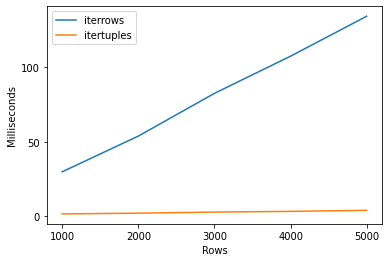

In [39]:
#q30
def rand_df(rows):
    return pd.DataFrame(np.random.randint(10, size=(rows, 4)),
                        columns=["A", "B", "C", "D"],
                        index=[f"r{i}" for i in range(1, rows+1)])
times_df = pd.DataFrame(dtype=float)
rows = [1000,2000,3000,4000,5000]
def row_time(df):
    t0 = time()
    for row in df.iterrows():
        pass
    t1 = time()
    return (t1-t0) * 1000
def tup_time(df):
    t0 = time()
    for row in df.itertuples():
        pass
    t1 = time()
    return (t1-t0) * 1000

for i in rows:
    df = rand_df(i)
    row = row_time(df)
    tup = tup_time(df)
    times_df.at[i,"iterrows"] = row
    times_df.at[i, "itertuples"] = tup
timeplot = times_df.plot.line()
timeplot.set_xlabel("Rows")
timeplot.set_ylabel("Milliseconds")
timeplot.set_xticks([1000,2000,3000,4000,5000])
timeplot.set_yticks([0,50,100])

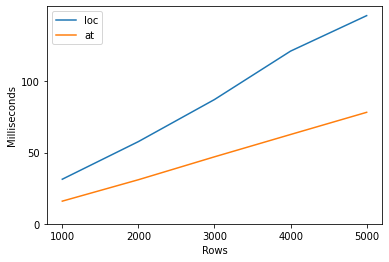

In [40]:
#q31
times_df_2 = pd.DataFrame(dtype=float)
def loc_time(df):
    t0 = time()
    total = 0
    for idx in df.index:
        for col in df.columns:
            total += df.loc[idx, col]
    t1 = time()
    return (t1-t0) * 1000
def at_time(df):
    t0 = time()
    total = 0
    for idx in df.index:
        for col in df.columns:
            total += df.at[idx, col]
    t1 = time()
    return (t1-t0) * 1000

for i in rows:
    df = rand_df(i)
    loc = loc_time(df)
    at = at_time(df)
    times_df_2.at[i,"loc"] = loc
    times_df_2.at[i, "at"] = at
timeplot2 = times_df_2.plot.line()
timeplot2.set_xlabel("Rows")
timeplot2.set_ylabel("Milliseconds")
timeplot2.set_xticks([1000,2000,3000,4000,5000])
timeplot2.set_yticks([0,50,100])

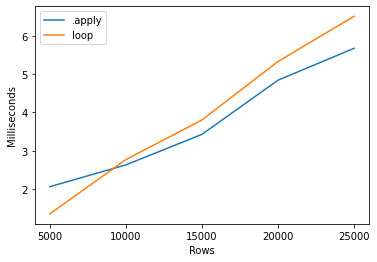

In [41]:
#q32
times_df_3 = pd.DataFrame(dtype=float)
rows = [5000,10000,15000,20000,25000]
def laugh(x):
    return "ha" * x

def applytime(df):
    t0 = time()
    result = df["A"].apply(laugh).tolist()
    t1 = time()
    return (t1 - t0) * 1000
def looptime(df):
    t0 = time()
    result = []
    for val in df["A"]:
        result.append(laugh(val))
    t1 = time()
    return (t1 - t0) * 1000

    
for i in rows:
    df = rand_df(i)
    apply = applytime(df)
    loop = looptime(df)
    times_df_3.at[i,".apply"] = apply
    times_df_3.at[i, "loop"] = loop
timeplot3 = times_df_3.plot.line()
timeplot3.set_xlabel("Rows")
timeplot3.set_ylabel("Milliseconds")
timeplot3.set_xticks([5000,10000,15000,20000,25000])